In [16]:
!pip install kaggle

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [21]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets list -s diabetes

ref                                                   title                                                size  lastUpdated          downloadCount  
----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
uciml/pima-indians-diabetes-database                  Pima Indians Diabetes Database                        9KB  2016-10-06 18:31:56          73574  
johndasilva/diabetes                                  diabetes                                             12KB  2018-04-25 19:17:46           2132  
brandao/diabetes                                      Diabetes 130 US hospitals for years 1999-2008         4MB  2017-10-31 15:53:55           5091  
codina/raman-spectroscopy-of-diabetes                 Raman spectroscopy of Diabetes                        1MB  2019-05-14 03:43:49            496  
GoogleNewsLab/health-searches-us-county               Health searches by US Metropolitan Area, 2005-

In [23]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database   -p /content

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
!unzip \*.zip

Archive:  pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes.csv            


In [26]:
#Importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

# Any results you write to the current directory are saved as output.
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
data.shape

(768, 9)

In [28]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


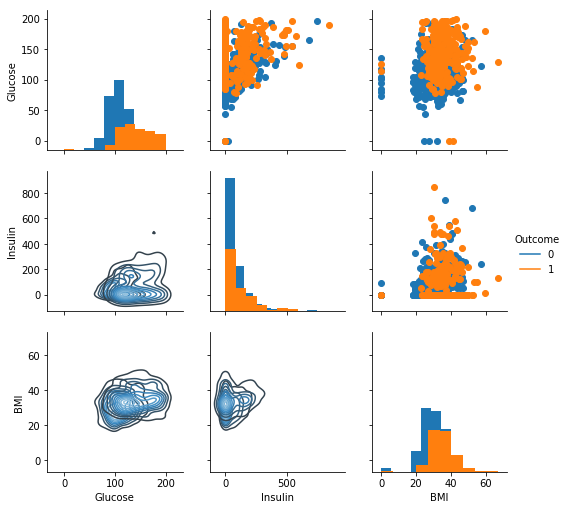

In [29]:
g = sns.PairGrid(data, vars=['Glucose', 'Insulin', 'BMI'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

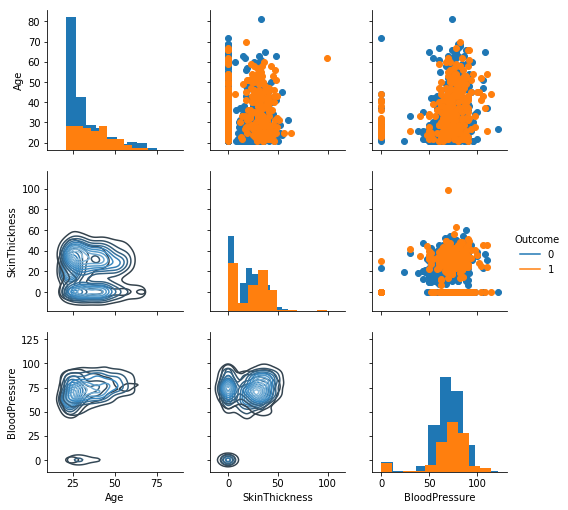

In [30]:
g = sns.PairGrid(data, vars=['Age', 'SkinThickness', 'BloodPressure'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

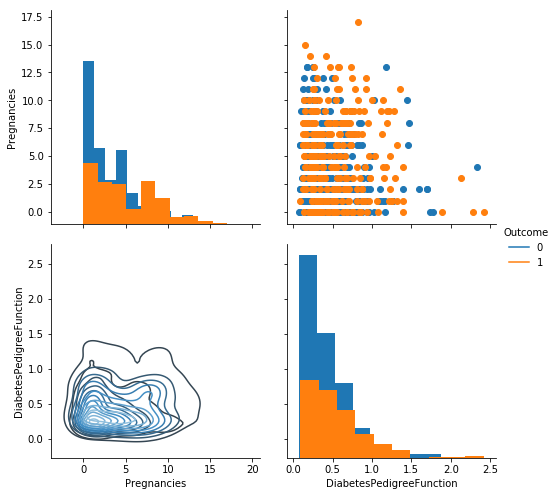

In [31]:
g = sns.PairGrid(data, vars=['Pregnancies', 'DiabetesPedigreeFunction'], hue="Outcome", size=3.5)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

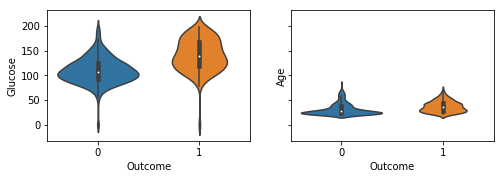

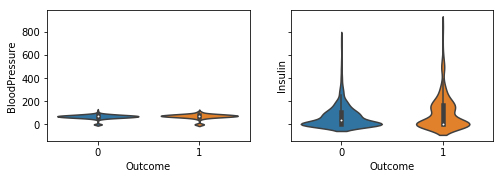

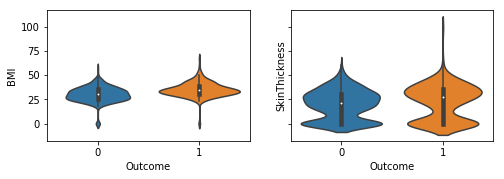

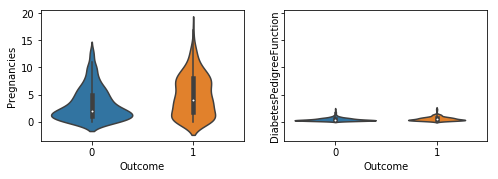

In [32]:
columns = ['Glucose', 'Age', 'BloodPressure', 'Insulin','BMI','SkinThickness' ,'Pregnancies',  'DiabetesPedigreeFunction']
n_cols = 2
n_rows = 4
idx = 0

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(8, 2.4))
    for j in range(n_cols):
        sns.violinplot(x = data.Outcome, y=data[columns[idx]], ax=ax[j]) 
        idx += 1
        if idx >= 8:
            break

In [0]:
# remove the Outlier of skin thickness

max_skinthickness = data.SkinThickness.max()
data = data[data.SkinThickness!=max_skinthickness]


In [0]:
# create a helper function
def replace_zero(df, field, target):
    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

    # run the function
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
    replace_zero(data, col, 'Outcome')    

In [35]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,121.598641,72.431749,29.113796,156.938543,32.443489,0.471742,33.203390,0.348110
std,3.371117,30.359689,12.113731,8.547994,88.900636,6.882979,0.331524,11.721879,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.000000,0.371000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.631285,206.846154,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
# Split data

X = data.iloc[:,:-1]
y = data.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)

(536, 8)
(231, 8)
536
231


In [0]:
# load algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score

# helper functions
def train_clf(clf, X_train, y_train):
    
    return clf.fit(X_train, y_train)
    
def pred_clf(clf, features, target):
    
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred, pos_label = 1)

def train_predict(clf, X_train, y_train, X_test, y_test):
    
    train_clf(clf, X_train, y_train)
    
    print("F1 score for training set is: {:.4f}".format(pred_clf(clf, X_train, y_train)))
    print("F1 score for testing set is: {:.4f}\n".format(pred_clf(clf, X_test, y_test)))

In [39]:
# load algorithms
nb = GaussianNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
abc = AdaBoostClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)

algorithms = [nb,knn, dtc, rfc, abc, gbc]

for clf in algorithms:
    """
    print("\n{}: \n".format(clf.__class__.__name__))
    
    # create training data from first 100, then 200, then 300
    #for n in [179, 358, 537]:
        #train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)
    """        
    print("{}:".format(clf))
    train_predict(clf, X_train, y_train, X_test, y_test)


GaussianNB(priors=None, var_smoothing=1e-09):
F1 score for training set is: 0.6816
F1 score for testing set is: 0.6538

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
F1 score for training set is: 0.8392
F1 score for testing set is: 0.7368

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best'):
F1 score for training set is: 1.0000
F1 score for testing set is: 0.7468

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_l

In [40]:
#Optimizing the KNN model
# split training set into training and testing set
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size = 0.3, random_state=100)
for n in range(3,10):    
    knn = KNeighborsClassifier(n_neighbors=n)
    print("Number of neighbors is: {}".format(n))
    train_predict(knn, X_train_cv, y_train_cv, X_test_cv, y_test_cv)

Number of neighbors is: 3
F1 score for training set is: 0.8494
F1 score for testing set is: 0.7963

Number of neighbors is: 4
F1 score for training set is: 0.8133
F1 score for testing set is: 0.7810

Number of neighbors is: 5
F1 score for training set is: 0.8372
F1 score for testing set is: 0.8108

Number of neighbors is: 6
F1 score for training set is: 0.8175
F1 score for testing set is: 0.8224

Number of neighbors is: 7
F1 score for training set is: 0.8226
F1 score for testing set is: 0.8214

Number of neighbors is: 8
F1 score for training set is: 0.8031
F1 score for testing set is: 0.8333

Number of neighbors is: 9
F1 score for training set is: 0.8226
F1 score for testing set is: 0.8214



In [41]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=8)
clf_ = knn.fit(X_train, y_train)
y_pred = clf_.predict(X_test)
print('Accuracy is {}'.format(accuracy_score(y_test,y_pred )))

Accuracy is 0.8138528138528138


In [0]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
params = {'n_estimators':1200, 'max_depth':9, 'subsample':0.5, 'learning_rate':0.01, 'min_samples_leaf':1, 'random_state':0}
gbc = GradientBoostingClassifier(**params)

n_estimators = 10
clf = gbc

In [0]:
# split training set into training and testing set
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size = 0.3, random_state=100)

X_train_cv = X_train_cv.reset_index(drop=True, inplace=False)
y_train_cv = y_train_cv.reset_index(drop=True, inplace=False)


clf.fit(X_train_cv,y_train_cv)
#score = f1_score(y_train, clf.predict(X_train), pos_label = 1)
acc = clf.score(X_test_cv, y_test_cv)
    
n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1

In [0]:
""" The following part code was stole from sklearn """
def heldout_score(clf, X_test_cv, y_test_cv):
    """compute deviance scores on ``X_test`` and ``y_test``. """
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_decision_function(X_test_cv)):
        score[i] = clf.loss_(y_test_cv, y_pred)
    return score

In [0]:
def cv_estimate(n_splits=10):
    cv = KFold(n_splits=n_splits)
    cv_clf = clf
    val_scores = np.zeros((n_estimators,), dtype=np.float64)
    for train, test in cv.split(X_train_cv):
        cv_clf.fit(X_train_cv.iloc[train], y_train_cv[train])
        val_scores += heldout_score(cv_clf, X_train_cv.iloc[test], y_train_cv[test])
    val_scores /= n_splits
    return val_scores

In [0]:
# Estimate best n_estimator using cross-validation
cv_score = cv_estimate(3)

# Compute best n_estimator for test data
test_score = heldout_score(clf, X_test_cv, y_test_cv)

# negative cumulative sum of oob improvements
cumsum = -np.cumsum(clf.oob_improvement_)

# min loss according to OOB
oob_best_iter = x[np.argmin(cumsum)]

# min loss according to test (normalize such that first loss is 0)
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

# min loss according to cv (normalize such that first loss is 0)
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

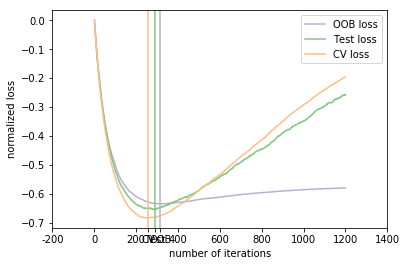

In [47]:
# color brew for the three curves
oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

# plot curves and vertical lines for best iterations
plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

# add three vertical lines to xticks
xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                        [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OOB', 'CV', 'Test'])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label)

plt.legend(loc='upper right')
plt.ylabel('normalized loss')
plt.xlabel('number of iterations')

plt.show()


In [48]:
from sklearn.metrics import accuracy_score

params = {'max_depth':9, 'subsample':0.5, 'learning_rate':0.01, 'min_samples_leaf':1, 'random_state':0}
gbc = GradientBoostingClassifier(n_estimators=290, **params)
clf_ = gbc.fit(X_train, y_train)
y_pred = clf_.predict(X_test)
print('Accuracy is {}'.format(accuracy_score(y_test,y_pred )))
train_predict(gbc, X_train, y_train, X_test, y_test)

Accuracy is 0.8701298701298701
F1 score for training set is: 1.0000
F1 score for testing set is: 0.8052



In [49]:
gbc.feature_importances_

array([0.0315515 , 0.11949234, 0.05243605, 0.08566479, 0.51856776,
       0.06071653, 0.06710162, 0.06446942])